# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение здесь***

$Q = \dfrac{1}{n}\sum\limits_{k=1}^{n} L(w, x_{j_k}, y_{j_k}) + \dfrac{1}{C} w^*w$, 

$L(w, x, y)) = (y - w^*x)^2$

$w_{new} = w_{old} - \alpha\nabla_w Q$

$\nabla_w L = -2(y - w^*x)x$

$ w_{new} = w_{old} + \dfrac{2\alpha}{n}\sum\limits_{k=1}^{n} (y_{j_k} - w^*x_{j_k})x_{j_k} - \dfrac{2\alpha}{C}w_{old}$, 
где $\{j_1, \ldots, j_n\}$ - случайный набор уникальных индексов из набора $\{1, \ldots, n\}$, 
$\alpha$ - зависящая от номера шага невозрастающая функция, например, $\alpha = \dfrac{1}{(\text{номер шага})^p}$.

Интуитивный градиент: линейная комбинация точек выборки с весами, равными ошибкам в соответствующих точках, взятым с обратным знаком

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение здесь***

$Q = \dfrac{1}{n}\sum\limits_{k=1}^{n} L(w, x_{j_k}, y_{j_k}) + \dfrac{1}{C} w^*w$, 

$L(w, x, y)) = -[y\log(\sigma(w^*x)) + (1 - y)\log(1 - \sigma(w^*x))]$

$w_{new} = w_{old} - \alpha\nabla_w Q$

$\nabla_w L = -\dfrac{y}{\sigma(w^*x)}\sigma'(w^*x)\nabla(w^*x) -\dfrac{1 - y}{1 - \sigma(w^*x)}(-\sigma'(w^*x))\nabla(w^*x)$, $\,\,$ 
$\sigma'(z) = \sigma(z)(1 - \sigma(z))$ 
$\Rightarrow$ 
$\nabla_w L = -y(1 - \sigma(w^*x))x + (1 - y)\sigma(w^*x)x = -(y - \sigma(w^*x))x$

$w_{new} = w_{old} + \dfrac{\alpha}{n}\sum\limits_{k=1}^{n} (y_{j_k}-\sigma(w^*x_{j_k}))x_{j_k} - \dfrac{2\alpha}{C} w_{old}$, 
где $\{j_1, \ldots, j_n\}$ - случайный набор уникальных индексов из набора $\{1, \ldots, n\}$, 
$\alpha$ - зависящая от номера шага невозрастающая функция, например, $\alpha = \dfrac{1}{(\text{номер шага})^p}$.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение здесь***

Задача 1: минимизировать $Q(w) = (Xw - y)^*(Xw-y)$. Рассмотрим вещественный случай и перейдём от эрмитова сопряжения к транспонированию.

$\nabla_w Q = 2X^TXw - 2X^Ty = 0$ $\Rightarrow$ $w_0 = (X^TX)^{-1}X^Ty$

$H(Q) = [\nabla_w [\nabla_w Q]_1, \nabla_w [\nabla_w Q]_2, \ldots, \nabla_w [\nabla_w Q]_D] = $ 
$2[\nabla_w ([X^T]_1 Xw), \nabla_w ([X^T]_2 Xw, \ldots, \nabla_w ([X^T]_D Xw))]$,
здесь индексы $1, 2, \ldots, D$ обозначают строки. 

$H(Q) = 2[X^T[X^T]_1^T, X^T[X^T]_2^T, \ldots, X^T[X^T]_D^T] = 2X^T (X^T)^T = 2X^T X > 0$, так как $(X^TXz, z) = (Xz, Xz) > 0$ $\forall z \neq 0$ $\Rightarrow w_0$ - точка минимума $Q$, причём глобального, так как это единственная точка экстремума.


Задача 2: минимизировать $Q'(w) = (Xw - y)^T(Xw-y) + \dfrac{1}{C} w^Tw$.

$\nabla_W Q' = 2X^TXw - 2X^Ty + \dfrac{2}{C}w = 0$
$\Rightarrow$ $w_0' = (X^T X + \dfrac{1}{C}I)^{-1}X^Ty$.

Если матрица $X$ имеет линейно зависимые строки, то Гессиан в исходно задаче только неотрицательно определён. Тогда добавка $\dfrac{2}{C}I$ к диагонали может это исправить (сделать строго положительно определённым) для достаточно больших $C$, так как новый Гессиан $H(Q') = 2X^T X + \dfrac{2}{C}I$ будет иметь положительное диагональное преобладание в главных минорах.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение здесь***

$E(L | x_i) = -p(y_i == 1 | x_i) \log a(x_i) + (p(y_i == 1 | x_i) - 1) \log (1 - a(x_i))$

$\dfrac{\partial L}{\partial a(x_i)} = -\dfrac{p(y_i == 1 | x_i)}{a(x_i)} - \dfrac{(p(y_i == 1 | x_i) - 1)}{1 - a(x_i)} = 0$ 
$\Rightarrow$
$0 = (1 - a(x_i))p(y_i == 1 | x_i) + a(x_i)(p(y_i == 1 | x_i) - 1) = p(y_i == 1 | x_i) - a(x_i)$
$\Rightarrow$
$a(x_i) = p(y_i == 1 | x_i)$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение здесь***

Вообще говоря, его включать не нужно, так как $w_0$ в скалярном произведении умножается на $x_0 \equiv 1$, а регляризация проводится с целью пресечь большие изменения функции потерь при малом изменении входных параметров:
$w_k < C_1$, 
$\|x_i^{(1)} - x_i^{(0)}\| < \delta$ 
$\Rightarrow$ 
$dL (w, x_i, y) < \delta C_2$. 
Легко видеть, что $da(x_i, w) = d(w^*x_i)$ не зависит от $w_0$ $\Rightarrow$ его учитывать при регуляризации не обязательно.



#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
# %%pycodestyle

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    N, D = X.shape
    idx = np.arange(N)
    off = 0
    cnt = N // batch_size

    if shuffle:
        gen = np.random.default_rng()
        gen.shuffle(X, axis=0)
    X_batch = X[0:batch_size]
    y_batch = y[0:batch_size]
    for i in range(cnt):
        X_batch = X[off : off + batch_size]
        y_batch = y[off : off + batch_size]
        yield (X_batch, y_batch)
        off += batch_size

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
X = np.arange(60).reshape((20, 3))
y = np.zeros(20) 
gen = batch_generator(X, y, shuffle=False, batch_size=4)
for b in gen:
    print(list(b))

[array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]]), array([0., 0., 0., 0.])]
[array([[12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]]), array([0., 0., 0., 0.])]
[array([[24, 25, 26],
       [27, 28, 29],
       [30, 31, 32],
       [33, 34, 35]]), array([0., 0., 0., 0.])]
[array([[36, 37, 38],
       [39, 40, 41],
       [42, 43, 44],
       [45, 46, 47]]), array([0., 0., 0., 0.])]
[array([[48, 49, 50],
       [51, 52, 53],
       [54, 55, 56],
       [57, 58, 59]]), array([0., 0., 0., 0.])]


In [8]:
# %%pycodestyle

from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    x = np.asarray(x)
    sigm_value_x = np.exp(-x) + 1
    sigm_value_x = 1 / sigm_value_x
    return sigm_value_x


def safe_log(x):
    x = np.where(x <= 0.001, 0.001, x)
    x = np.where(x == 1, 1.001, x)
    return np.log(x)


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.001, max_epoch=10,
                 model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        loss_all = 0
        n = X_batch.shape[0]
        a = np.dot(X_batch, self.weights)
        L2_reg = (self.weights * self.weights).sum() / self.C
        if self.model_type == 'lin_reg':  
            loss_all = (y_batch - a) ** 2
        elif self.model_type == 'log_reg':
            sigm_arr = sigmoid(a)
            loss_all = -y_batch * safe_log(sigm_arr) - (1 - y_batch) * safe_log(1 - sigm_arr)
        loss = np.sum(loss_all) / n + L2_reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = 0
        n = X_batch.shape[0]
        a = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            loss_grad = 2 * np.dot(y_batch - a, X_batch)
        elif self.model_type == 'log_reg':
            loss_grad = np.dot(y_batch - sigmoid(a), X_batch)
        loss_grad = -1 / n * loss_grad
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        w_0 = self.weights[0]
        self.weights = self.weights - self.alpha * (new_grad - 2 / self.C * self.weights)
        self.weights[0] = self.weights[0] + 2 * self.alpha / self.C * w_0

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.c_[np.ones(X.shape[0]), X]
        # Нужно инициализровать случайно веса
        self.weights = -1 + 2 * np.random.randn(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]               
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        X_norm = np.c_[np.ones(X.shape[0]), X]
        a = np.dot(X_norm, self.weights)
        if self.model_type == 'lin_reg':
            y_hat = a
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(a)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
# %%pycodestyle

def plot_decision_boundary(clf, color='black'):
    w = clf.weights
    pts = np.linspace(-5, 8)
    print(w)
    plt.plot(pts, -(w[0] + w[1] * pts) / w[2], color=color)

In [29]:
# %%pycodestyle

my_clf_lin = MySGDClassifier(batch_generator, alpha=0.01, max_epoch=50,
                             C=500, model_type='lin_reg', batch_size=5)
my_clf_lin.fit(X, y)

my_clf_log = MySGDClassifier(batch_generator, alpha=0.05, max_epoch=10,
                             C=200, model_type='log_reg', batch_size=150)
my_clf_log.fit(X, y)

MySGDClassifier(C=200, alpha=0.05,
                batch_generator=<function batch_generator at 0x7f1baf3dcf28>,
                batch_size=150, max_epoch=10, model_type='log_reg')

[ 0.41450805 -0.06461877  0.10650471]
[-1.7260002   0.43016232 -0.30434928]


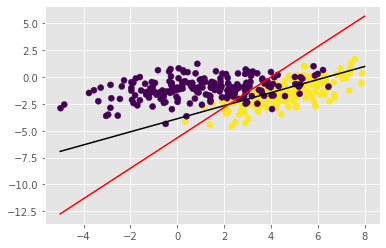

In [30]:
# %%pycodestyle

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plot_decision_boundary(my_clf_lin, color='black')
plot_decision_boundary(my_clf_log, color='red')

plt.scatter(X[:, 0], X[:, 1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

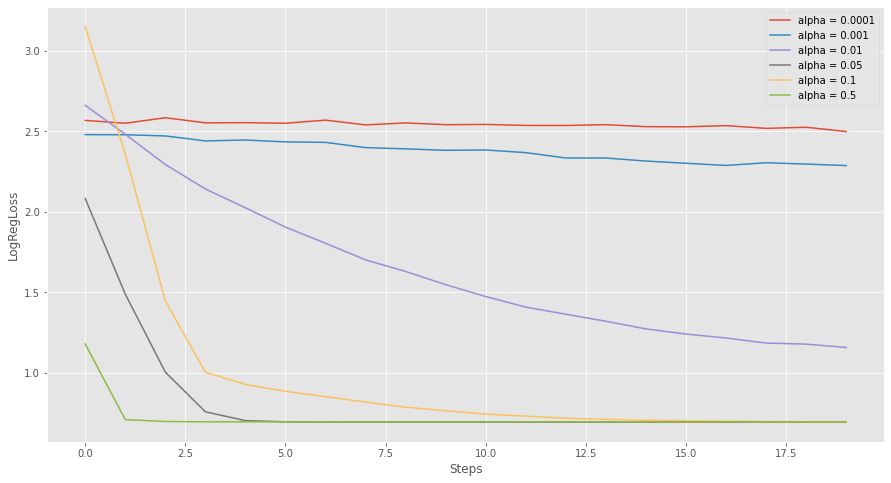

In [14]:
# %%pycodestyle

plt.figure(figsize=(15, 8))
aplha_arr = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5]
N = 100
for alpha in aplha_arr:
    my_clf_log = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=10,
                                 C=100, batch_size=500, model_type='log_reg')
    my_clf_log.fit(X, y)
    steps = len(my_clf_log.errors_log['loss']) // N
    losses = []
    for i in range(steps):
        losses.append(np.sum(my_clf_log.errors_log['loss'][i * N : (i + 1) * N]) / N)
    plt.plot(np.arange(len(losses)), losses, label='alpha = {}'.format(alpha))
plt.xlabel('Steps')
plt.ylabel('LogRegLoss')
plt.legend()
plt.show()


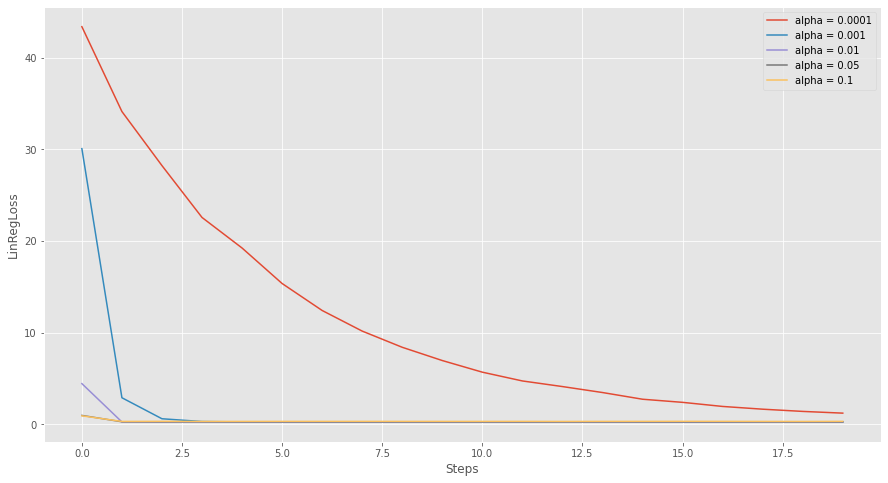

In [15]:
# %%pycodestyle

plt.figure(figsize=(15, 8))
aplha_arr = [0.0001, 0.001, 0.01, 0.05, 0.1]
N = 500
for alpha in aplha_arr:
    my_clf_lin = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=1,
                                 C=1000, model_type='lin_reg', batch_size=10)
    my_clf_lin.fit(X, y)
    steps = len(my_clf_lin.errors_log['loss']) // N
    losses = []
    for i in range(steps):
        losses.append(np.sum(my_clf_lin.errors_log['loss'][i * N : (i + 1) * N]) / N)
    plt.plot(np.arange(len(losses)), losses, label='alpha = {}'.format(alpha))
plt.xlabel('Steps')
plt.ylabel('LinRegLoss')
plt.legend()
plt.show()


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

***Ответ***

При относительно больших $\alpha$ сходимость медленная, стабилизируется за несколько эпох, для малых значений сходимость на графике еще не видна. В то же время $\alpha = 0.1$ даёт хорошую скорость сходимости. При тестировании $\alpha \geq 0.5$ возникали ошибки переполнения.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

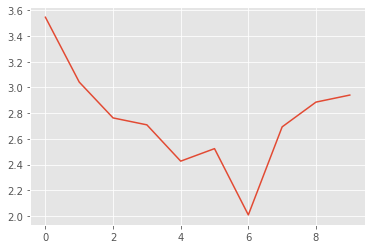

In [16]:
# %%pycodestyle

C_arr = np.logspace(-3, 3, 10)
res1 = []
for C in C_arr:
    my_clf_log = MySGDClassifier(batch_generator, batch_size=100, max_epoch=30,
                                 C=C, alpha=0.00000001, model_type='log_reg')
    my_clf_log.fit(X, y)
    res1.append(np.linalg.norm(my_clf_log.weights))
plt.plot(range(len(res1)), np.log2(res1))
plt.show()

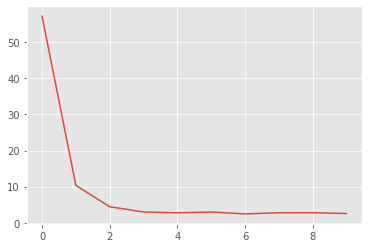

In [17]:
# %%pycodestyle

C_arr = np.logspace(-3, 3, 10)
res2 = []
for C in C_arr:
    my_clf_lin = MySGDClassifier(batch_generator, batch_size=10, max_epoch=10,
                                 C=C, alpha=0.0000001, model_type='lin_reg')
    my_clf_lin.fit(X, y)
    res2.append(np.linalg.norm(my_clf_lin.weights))
plt.plot(range(len(res2)), np.log2(res2))
plt.show()

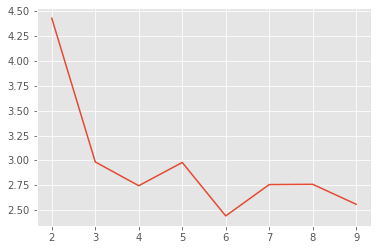

In [18]:
# %%pycodestyle

plt.plot(range(len(res2))[2:], np.log2(res2[2:]))
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

***Ответ***

норма вектора весов стабилизируется при $C \geq 10^{-1}$ на уровне порядка 10, что хорошо для 11-мерного вектора. 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


FileNotFoundError: ignored

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [ ]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***